## BANA 212 Final Project
### Group 2: Salem Arthur, Karl Hickel, Candice Biying Han, Kathy Yu-Hsin Lee

In [1]:
# import packages
import numpy as np
import pandas as pd
import pandas.plotting 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline
from matplotlib import rc
import matplotlib.image as pltimg

#!pip install --upgrade scikit-learn
import sklearn
#import sklearn.linear_model.LogisticRegression
from sklearn import svm
from sklearn import tree
import sklearn.tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets
from sklearn.datasets import load_iris
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.model_selection
import sklearn.ensemble

import pydotplus
from IPython.display import Image
import graphviz

import urllib
import bs4
import itertools

import os
from os import system

In [2]:
# Read in LendingClub data
data = pd.read_csv('lc_2016_2017.csv')

/Users/candice/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# See colums of the dataset
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_de

In [4]:
# drop columns we dont need
data = data.drop(['member_id', 'installment', 'emp_title', 'emp_length', 'verification_status',
                  'issue_d', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line','inq_last_6mths', 
                  'mths_since_last_delinq', 'mths_since_last_record','open_acc', 'pub_rec', 'revol_bal', 
                  'revol_util', 'total_acc','initial_list_status', 'out_prncp', 'out_prncp_inv', 
                  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                  'collection_recovery_fee', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
                  'collections_12_mths_ex_med', 'mths_since_last_major_derog','policy_code', 'application_type', 
                  'annual_inc_joint', 'dti_joint','verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
                  'tot_cur_bal', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
                  'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 
                  'inq_fi','total_cu_tl', 'inq_last_12m' ], axis=1)
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,last_pymnt_amnt
0,112435993,2300,2300,2300.0,36 months,12.62,C,C1,OWN,10000.0,Current,n,credit_card,21.61,0,382.99,382.99,77.08
1,112290210,16000,16000,16000.0,60 months,12.62,C,C1,MORTGAGE,94000.0,Current,n,debt_consolidation,25.61,0,2060.09,2060.09,360.95
2,112436985,6025,6025,6025.0,36 months,15.05,C,C4,MORTGAGE,46350.0,Current,n,home_improvement,8.88,0,1032.46,1032.46,209.01
3,112439006,20400,20400,20400.0,36 months,9.44,B,B1,RENT,44000.0,Current,n,car,27.06,0,3237.80,3237.80,652.91
4,112438929,13000,13000,13000.0,36 months,11.99,B,B5,MORTGAGE,85000.0,Current,n,debt_consolidation,6.79,1,2137.00,2137.00,431.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,A,A5,OWN,38000.0,Current,n,credit_card,12.35,0,4314.93,4314.93,187.72
759334,66055600,6000,6000,6000.0,36 months,9.17,B,B2,RENT,32640.0,Current,n,debt_consolidation,22.76,0,4417.05,4417.05,191.28
759335,66141895,14400,14400,14400.0,60 months,13.18,C,C3,RENT,47000.0,Late (16-30 days),n,credit_card,19.64,0,7227.02,7227.02,328.98
759336,65673209,34050,34050,34050.0,36 months,15.41,D,D1,MORTGAGE,87800.0,Current,n,credit_card,12.10,1,27480.73,27480.73,1187.21


In [5]:
# Check NA
data.isnull().sum()

id                   0
loan_amnt            0
funded_amnt          0
funded_amnt_inv      0
term                 0
int_rate             0
grade                0
sub_grade            0
home_ownership       0
annual_inc           0
loan_status          0
pymnt_plan           0
purpose              0
dti                355
delinq_2yrs          0
total_pymnt          0
total_pymnt_inv      0
last_pymnt_amnt      0
dtype: int64

## Default
### Assign Default Risk by Loan Status
- if loan_status is current or fully paid, its considered not default (N)
- if loan-status is In Grace Period, Late (31-120 days),Late (16-30 days), Charged Off, Default, its considered default (Y)

In [6]:
# Create the dictionary 
default_dictionary = {'Current':'No Risk', 'Fully Paid':'No Risk', 'Charged Off':'Default', 'Late (31-120 days)':'High Risk',
                     'Late (16-30 days)':'Medium Risk', 'In Grace Period':'Medium Risk', 'Default':'Default'} 
  
# Add a new column named 'default' 
data['default_risk'] = data['loan_status'].map(default_dictionary) 
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,last_pymnt_amnt,default_risk
0,112435993,2300,2300,2300.0,36 months,12.62,C,C1,OWN,10000.0,Current,n,credit_card,21.61,0,382.99,382.99,77.08,No Risk
1,112290210,16000,16000,16000.0,60 months,12.62,C,C1,MORTGAGE,94000.0,Current,n,debt_consolidation,25.61,0,2060.09,2060.09,360.95,No Risk
2,112436985,6025,6025,6025.0,36 months,15.05,C,C4,MORTGAGE,46350.0,Current,n,home_improvement,8.88,0,1032.46,1032.46,209.01,No Risk
3,112439006,20400,20400,20400.0,36 months,9.44,B,B1,RENT,44000.0,Current,n,car,27.06,0,3237.80,3237.80,652.91,No Risk
4,112438929,13000,13000,13000.0,36 months,11.99,B,B5,MORTGAGE,85000.0,Current,n,debt_consolidation,6.79,1,2137.00,2137.00,431.73,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,A,A5,OWN,38000.0,Current,n,credit_card,12.35,0,4314.93,4314.93,187.72,No Risk
759334,66055600,6000,6000,6000.0,36 months,9.17,B,B2,RENT,32640.0,Current,n,debt_consolidation,22.76,0,4417.05,4417.05,191.28,No Risk
759335,66141895,14400,14400,14400.0,60 months,13.18,C,C3,RENT,47000.0,Late (16-30 days),n,credit_card,19.64,0,7227.02,7227.02,328.98,Medium Risk
759336,65673209,34050,34050,34050.0,36 months,15.41,D,D1,MORTGAGE,87800.0,Current,n,credit_card,12.10,1,27480.73,27480.73,1187.21,No Risk


In [7]:
print(data['loan_status'].value_counts())
print(data['default_risk'].value_counts())
# numbers matched! 

Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: loan_status, dtype: int64
No Risk        696241
Default         37233
High Risk       15354
Medium Risk     10510
Name: default_risk, dtype: int64


In [8]:
# Count the original default rate
default_rate = data.default_risk.value_counts(normalize = True).mul(100).round(2)
default_rate

No Risk        91.69
Default         4.90
High Risk       2.02
Medium Risk     1.38
Name: default_risk, dtype: float64

### 1. Return on Investment

In [9]:
# return on investment of LendingClub
# only consider the default and fully paid status 

# defaulted loans
roi_default = 100*(data.loc[data['default_risk'] == 'Default', 'total_pymnt'].sum() 
                   - data.loc[data['default_risk'] == 'Default', 'funded_amnt'].sum())/data.loc[data['default_risk'] == 'Default', 'funded_amnt'].sum()
print('return on investment for defaulted loans: ',roi_default)

roi_paid = 100*(data.loc[data['loan_status'] == 'Fully Paid', 'total_pymnt'].sum() 
                - data.loc[data['loan_status'] == 'Fully Paid', 'funded_amnt'].sum())/data.loc[data['loan_status'] == 'Fully Paid', 'funded_amnt'].sum()
print('return on investment for fully paid loans: ',roi_paid)

return on investment for defaulted loans:  -70.61041780037785
return on investment for fully paid loans:  8.489282767312927


### 2. Average Annual Income of Each Default Risk Group

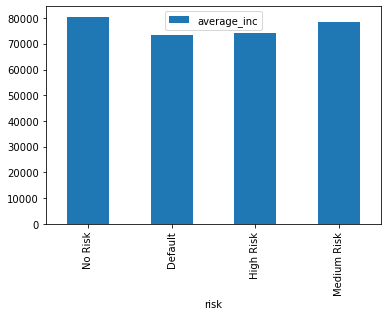

In [10]:
annInc = data["annual_inc"]
#sns.histplot()
#data["annual_inc"].mean()
#plot1 = data.plot.bar(x='default_risk',y=data["annual_inc"].mean())

noRisk = data.loc[data["default_risk"] == "No Risk"]
default = data.loc[data["default_risk"] == "Default"]
highRisk = data.loc[data["default_risk"] == "High Risk"]
mediumRisk = data.loc[data["default_risk"] == "Medium Risk"]

noRiskMean = noRisk["annual_inc"].mean()
defaultMean = default["annual_inc"].mean()
highRiskMean = highRisk["annual_inc"].mean()
mediumRisk = mediumRisk["annual_inc"].mean()

riskMean = pd.DataFrame({'risk':["No Risk", "Default", "High Risk", "Medium Risk"],'average_inc':[noRiskMean,defaultMean,highRiskMean,mediumRisk]})

riskMean

plot1 = riskMean.plot.bar(x = 'risk', y = 'average_inc')

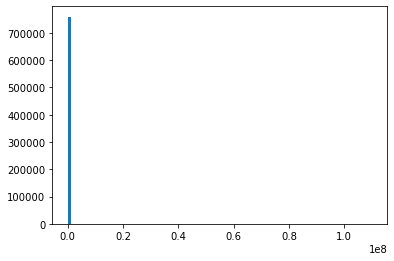

In [11]:
plt.hist(annInc, bins = 100)
plt.show()

### 3. Income Level of Each Default Risk Group

In [12]:
#Delete rows with 0 value in annual income column
data[data.annual_inc == 0]

#Use quantile to decide income level
data["annual_inc"].quantile([.25, .5, .75])

0.25    48000.0
0.50    67000.0
0.75    95000.0
Name: annual_inc, dtype: float64

In [13]:
# low income: <48,000 / mid-low income: 48,000-67,000/ mid-high income: 67,001-95,000/ high income: > 95,000
# Assign income level to each id
income_level = []
for income in data["annual_inc"]:
    if income < 48000:
        income_level.append("low")
        pass
    elif income < 67000:
        income_level.append("mid_low")
        pass
    elif income < 95000:
        income_level.append("mid_high")
        pass
    else:
        income_level.append("high")

# Add a new column
data["income_level"] = pd.DataFrame(income_level)

# Summarise
data["income_level"].value_counts()

high        195890
mid_low     190822
low         188062
mid_high    184564
Name: income_level, dtype: int64

In [14]:
#Calculate numbers of id falling into default risk of each income level
inc_def = data.groupby(['income_level', 'default_risk'])['income_level'].count()
inc_def

income_level  default_risk
high          Default           7708
              High Risk         3441
              Medium Risk       2579
              No Risk         182162
low           Default          10723
              High Risk         4254
              Medium Risk       2486
              No Risk         170599
mid_high      Default           8918
              High Risk         3590
              Medium Risk       2734
              No Risk         169322
mid_low       Default           9884
              High Risk         4069
              Medium Risk       2711
              No Risk         174158
Name: income_level, dtype: int64

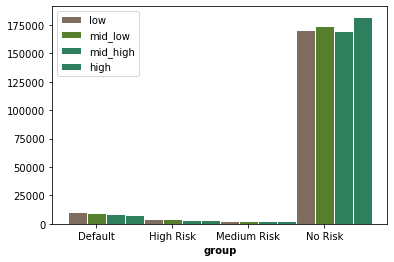

In [15]:
# bar plot: income_level vs. default risk
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [inc_def["low"]["Default"], inc_def["low"]["High Risk"], inc_def["low"]["Medium Risk"], inc_def["low"]["No Risk"]]
bars2 = [inc_def["mid_low"]["Default"], inc_def["mid_low"]["High Risk"], inc_def["mid_low"]["Medium Risk"], inc_def["mid_low"]["No Risk"]]
bars3 = [inc_def["mid_high"]["Default"], inc_def["mid_high"]["High Risk"], inc_def["mid_high"]["Medium Risk"], inc_def["mid_high"]["No Risk"]]
bars4 = [inc_def["high"]["Default"], inc_def["high"]["High Risk"], inc_def["high"]["Medium Risk"], inc_def["high"]["No Risk"]]
    
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='low')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='mid_low')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='mid_high')
plt.bar(r4, bars4, color='#2d7f5e', width=barWidth, edgecolor='white', label='high')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Default', 'High Risk', 'Medium Risk', 'No Risk'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

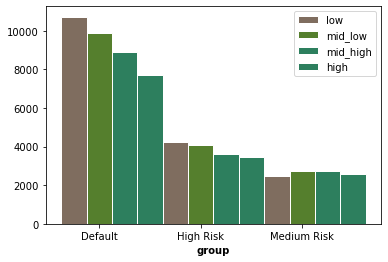

In [16]:
#bar plot: income_level vs. default risk
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [inc_def["low"]["Default"], inc_def["low"]["High Risk"], inc_def["low"]["Medium Risk"]]
bars2 = [inc_def["mid_low"]["Default"], inc_def["mid_low"]["High Risk"], inc_def["mid_low"]["Medium Risk"]]
bars3 = [inc_def["mid_high"]["Default"], inc_def["mid_high"]["High Risk"], inc_def["mid_high"]["Medium Risk"]]
bars4 = [inc_def["high"]["Default"], inc_def["high"]["High Risk"], inc_def["high"]["Medium Risk"]]
    
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='low')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='mid_low')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='mid_high')
plt.bar(r4, bars4, color='#2d7f5e', width=barWidth, edgecolor='white', label='high')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Default', 'High Risk', 'Medium Risk'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

### 4. Pupose of Each Default Risk Group

In [17]:
pur = data.groupby(['purpose', 'default_risk'])['purpose'].count()
pur

purpose             default_risk
car                 Default            314
                    High Risk          106
                    Medium Risk        100
                    No Risk           8257
credit_card         Default           6492
                    High Risk         2593
                    Medium Risk       1772
                    No Risk         146911
debt_consolidation  Default          22372
                    High Risk         9343
                    Medium Risk       6423
                    No Risk         393392
home_improvement    Default           2414
                    High Risk          998
                    Medium Risk        732
                    No Risk          53053
house               Default            215
                    High Risk           93
                    Medium Risk         68
                    No Risk           3185
major_purchase      Default            892
                    High Risk          378
                    M

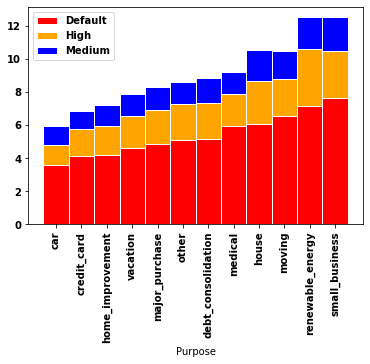

In [18]:
# create a percent stacked barplot to show the percentage of each risk level in different purposes
from matplotlib import rc

# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bar1 = [pur['car']['Default'],pur['credit_card']['Default'],pur['home_improvement']['Default'],
        pur['vacation']['Default'],pur['major_purchase']['Default'],pur['other']['Default'], 
        pur['debt_consolidation']['Default'],pur['medical']['Default'],pur['house']['Default'],
        pur['moving']['Default'],pur['renewable_energy']['Default'],pur['small_business']['Default']]

bar2 = [pur['car']['High Risk'],pur['credit_card']['High Risk'],pur['home_improvement']['High Risk'],
        pur['vacation']['High Risk'],pur['major_purchase']['High Risk'],pur['other']['High Risk'], 
        pur['debt_consolidation']['High Risk'],pur['medical']['High Risk'],pur['house']['High Risk'],
        pur['moving']['High Risk'],pur['renewable_energy']['High Risk'],pur['small_business']['High Risk']]

bar3 = [pur['car']['Medium Risk'],pur['credit_card']['Medium Risk'],pur['home_improvement']['Medium Risk'],
        pur['vacation']['Medium Risk'],pur['major_purchase']['Medium Risk'],pur['other']['Medium Risk'], 
        pur['debt_consolidation']['Medium Risk'],pur['medical']['Medium Risk'],pur['house']['Medium Risk'],
        pur['moving']['Medium Risk'],pur['renewable_energy']['Medium Risk'],pur['small_business']['Medium Risk']]

bar4 = [pur['car']['No Risk'],pur['credit_card']['No Risk'],pur['home_improvement']['No Risk'],pur['vacation']['No Risk'],pur['major_purchase']['No Risk'],pur['other']['No Risk'], pur['debt_consolidation']['No Risk'],pur['medical']['No Risk'],pur['house']['No Risk'],pur['moving']['No Risk'],pur['renewable_energy']['No Risk'],pur['small_business']['No Risk']]

totals = [i+j+k+z for i,j,k,z in zip(bar1,bar2,bar3,bar4)]
default = [i / j * 100 for i,j in zip(bar1, totals)]
high = [i / j * 100 for i,j in zip(bar2, totals)]
medium = [i / j * 100 for i,j in zip(bar3, totals)]
no = [i / j * 100 for i,j in zip(bar4, totals)]


# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11]
 
# Names of group and bar width
names = ['car','credit_card','home_improvement','vacation','major_purchase','other',
         'debt_consolidation','medical','house','moving','renewable_energy','small_business',]
barWidth = 1

# Create default bar as red
plt.bar(r, default, color = 'red', edgecolor = 'white', width = barWidth)
# Create high risk bar as orange
plt.bar(r, high, bottom = default, color='orange', edgecolor = 'white', width = barWidth)
# Create medium risk bar as blue
plt.bar(r, medium, bottom = [i+j for i,j in zip(default,high)], color = 'blue', edgecolor = 'white', width = barWidth)
# Create no risk bar as green
#plt.bar(r, no, bottom = [i+j+z for i,j,z in zip(default,high,medium)], color = 'green', edgecolor = 'white', width = barWidth)


# Custom X axis
plt.xticks(r, names,rotation = 90)
plt.xlabel("Purpose")

#Legend
plt.legend(['Default','High','Medium'])
 
# Show graphic
plt.show()

### 5. Term of Each Default Risk Group

In [19]:
term = data.groupby(['term', 'default_risk'])['purpose'].count()
term

term       default_risk
36 months  Default          25203
           High Risk        10630
           Medium Risk       7262
           No Risk         518142
60 months  Default          12030
           High Risk         4724
           Medium Risk       3248
           No Risk         178099
Name: purpose, dtype: int64

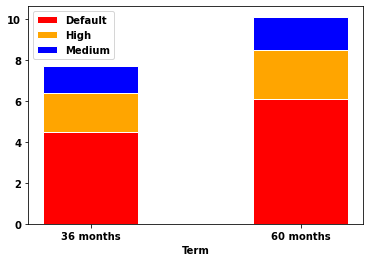

In [20]:
#bar plot: term vs. default risk
# set width of bar
barWidth = 0.45
 
# set height of bar
bars1 = [term["36 months"]["Default"], term["60 months"]["Default"]]
bars2 = [term["36 months"]["High Risk"], term["60 months"]["High Risk"]]
bars3 = [term["36 months"]["Medium Risk"], term["60 months"]["Medium Risk"]]
bars4 = [term["36 months"]["No Risk"], term["60 months"]["No Risk"]]
    
totals = [i+j+k+z for i,j,k,z in zip(bars1,bars2,bars3,bars4)]
default = [i / j * 100 for i,j in zip(bars1, totals)]
high = [i / j * 100 for i,j in zip(bars2, totals)]
medium = [i / j * 100 for i,j in zip(bars3, totals)]
no = [i / j * 100 for i,j in zip(bars4, totals)]

r = [0, 1]
names = ['36 months', '60 months']
 
# Make the plot
plt.bar(r, default, color='red', width=barWidth, edgecolor='white', label='Default')
plt.bar(r, high, bottom = default, color='orange', width=barWidth, edgecolor='white', label='High Risk')
plt.bar(r, medium, bottom = [i+j for i,j in zip(default,high)], color='blue', width=barWidth, edgecolor='white', label='Medium Risk')

 
# Add xticks on the middle of the group bars
plt.xlabel('Term', fontweight='bold')
plt.xticks(r, names)
 
# Create legend & Show graphic
plt.legend(['Default','High','Medium'])
plt.show()

## Grade
### 1. Average Interest Rate of Each Loan Grade

In [21]:
# grade vs interest: if higher grade of the loan tend to have lower interest rate
# calculate the average interest rate for all grade of loans
for g in data['grade'].sort_values().unique():
    print('Average interest rate for',g,'is: ',data.loc[data['grade'] == g, 'int_rate'].mean())

Average interest rate for A is:  6.926255049504337
Average interest rate for B is:  10.383187338324486
Average interest rate for C is:  14.012157466488318
Average interest rate for D is:  18.43361093529974
Average interest rate for E is:  23.277900567212093
Average interest rate for F is:  27.224676925219033
Average interest rate for G is:  29.948677984467878


<AxesSubplot:xlabel='grade', ylabel='int_rate'>

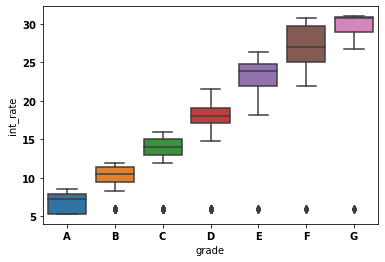

In [22]:
# grade vs interest: if higher grade of the loan tend to have lower interest rate
# create a boxplot to show the distribution of average interest rate for all grades of loans
sns.boxplot(x = data["grade"], y = data["int_rate"], order = ['A','B','C','D','E','F','G'])

### 2. Average Funded Amount of Each Loan Grade

In [23]:
# calculate the average funded amount for all grade of loans
for g in data['grade'].sort_values().unique():
    print('Average funded amount for',g,'is: ',data.loc[data['grade'] == g, 'funded_amnt'].mean())

Average funded amount for A is:  14020.677096300104
Average funded amount for B is:  13375.611116647242
Average funded amount for C is:  14952.73843113396
Average funded amount for D is:  15959.760815859858
Average funded amount for E is:  17573.30501284724
Average funded amount for F is:  19028.284709650467
Average funded amount for G is:  20143.981397868884


<AxesSubplot:xlabel='grade', ylabel='funded_amnt'>

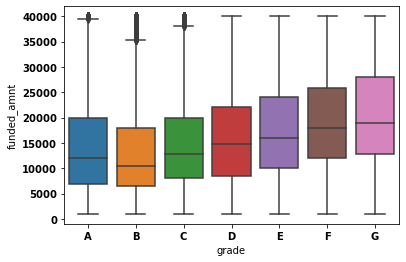

In [24]:
# grade vs funded amount: if higher grade of the loan tend to have higher funded amount
# create a boxplot to show the distribution of average funded amount for all grades of loans
sns.boxplot(x = data["grade"], y = data["funded_amnt"], order = ['A','B','C','D','E','F','G'])

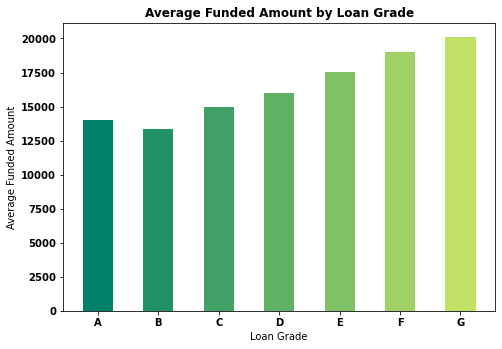

In [25]:
# Bar Plot
avg_fund = []
for g in data['grade'].sort_values().unique():
    avg_fund.append(data.loc[data['grade'] == g, 'funded_amnt'].mean())
grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create a bar plot
color = plt.cm.summer(np.linspace(0, 1, 9))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.ylabel('Average Funded Amount')
plt.xlabel('Loan Grade')
plt.title('Average Funded Amount by Loan Grade', fontweight = 'bold')

ax.bar(grade, avg_fund, color = color, width = 0.5)
plt.show()

### 3. Term of Each Loan Grade

In [26]:
# calculate the term for all grade of loans
term_def = data.groupby(['grade', 'term'])['grade'].count()
term_def

grade  term     
A      36 months    119053
       60 months      5464
B      36 months    196392
       60 months     34415
C      36 months    161410
       60 months     83493
D      36 months     61612
       60 months     36346
E      36 months     17816
       60 months     23438
F      36 months      3750
       60 months     10612
G      36 months      1204
       60 months      4333
Name: grade, dtype: int64

<AxesSubplot:>

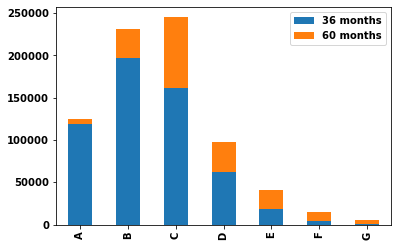

In [27]:
# Transform above data into a data frame
grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
short = [term_def['A'][0], term_def['B'][0], term_def['C'][0], term_def['D'][0], term_def['E'][0], term_def['F'][0], term_def['G'][0]]
long = [term_def['A'][1], term_def['B'][1], term_def['C'][1], term_def['D'][1], term_def['E'][1], term_def['F'][1], term_def['G'][1]]
term_def2 = pd.DataFrame({'36 months': short,'60 months': long}, index = grade)

# Bar Plot
term_def2.plot.bar(stacked = True)

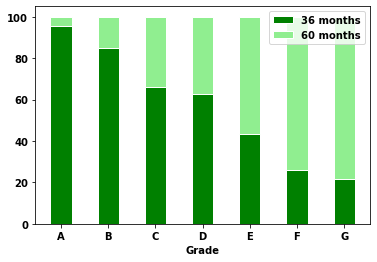

In [28]:
#bar plot: term vs. default risk
# set width of bar
barWidth = 0.45
 
# set height of bar
bars1 = [term_def["A"]["36 months"], term_def["B"]["36 months"], term_def["C"]["36 months"], term_def["D"]["36 months"], term_def["E"]["36 months"], term_def["F"]["36 months"], term_def["G"]["36 months"]]
bars2 = [term_def["A"]["60 months"], term_def["B"]["60 months"], term_def["C"]["60 months"], term_def["D"]["60 months"], term_def["E"]["60 months"], term_def["F"]["60 months"], term_def["G"]["60 months"]]

    
totals = [i+j for i,j in zip(bars1,bars2)]
month36 = [i / j * 100 for i,j in zip(bars1, totals)]
month60 = [i / j * 100 for i,j in zip(bars2, totals)]


r = [0, 1, 2, 3, 4, 5, 6]
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
 
# Make the plot
plt.bar(r, month36, color='green', width=barWidth, edgecolor='white', label='36 months')
plt.bar(r, month60, bottom = month36, color='lightgreen', width=barWidth, edgecolor='white', label='60 months')
 
# Add xticks on the middle of the group bars
plt.xlabel('Grade', fontweight='bold')
plt.xticks(r, names)
 
# Create legend & Show graphic
plt.legend(['36 months','60 months'])
plt.show()

## Home Ownership

### 1. Home Ownership vs. Loan Grade

In [29]:
home_grd = data.groupby(['grade', 'home_ownership'])['grade'].count()
home_grd

grade  home_ownership
A      ANY                   89
       MORTGAGE           72802
       OWN                14794
       RENT               36832
B      ANY                  166
       MORTGAGE          113690
       NONE                   1
       OWN                27034
       RENT               89916
C      ANY                  145
       MORTGAGE          115147
       NONE                   3
       OWN                28610
       RENT              100998
D      ANY                   67
       MORTGAGE           43313
       OWN                12121
       RENT               42457
E      ANY                   23
       MORTGAGE           18145
       OWN                 5059
       RENT               18027
F      ANY                    9
       MORTGAGE            6164
       OWN                 1814
       RENT                6375
G      ANY                    5
       MORTGAGE            2318
       OWN                  719
       RENT                2495
Name: grade, dtype

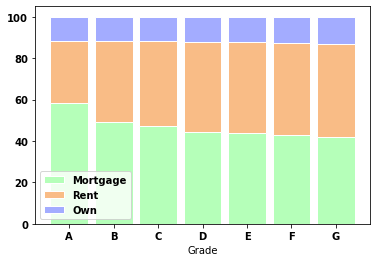

In [30]:
 # Data
bar1 = [home_grd['A']['MORTGAGE'], home_grd['B']['MORTGAGE'], home_grd['C']['MORTGAGE'], home_grd['D']['MORTGAGE'], home_grd['E']['MORTGAGE'], home_grd['F']['MORTGAGE'], home_grd['G']['MORTGAGE']]
bar2 = [home_grd['A']['RENT'], home_grd['B']['RENT'], home_grd['C']['RENT'], home_grd['D']['RENT'], home_grd['E']['RENT'], home_grd['F']['RENT'], home_grd['G']['RENT']]
bar3 = [home_grd['A']['OWN'], home_grd['B']['OWN'], home_grd['C']['OWN'], home_grd['D']['OWN'], home_grd['E']['OWN'], home_grd['F']['OWN'], home_grd['G']['OWN']]

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(bar1, bar2, bar3)]
mortgage = [i / j * 100 for i,j in zip(bar1, totals)]
rent = [i / j * 100 for i,j in zip(bar2, totals)]
own = [i / j * 100 for i,j in zip(bar3, totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E','F', 'G')
r = [0, 1, 2, 3, 4, 5, 6] 
          
# Create bars
plt.bar(r, mortgage, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'Mortgage')
plt.bar(r, rent, bottom=mortgage, color='#f9bc86', edgecolor='white', width=barWidth, label = 'Rent')
plt.bar(r, own, bottom=[i+j for i,j in zip(mortgage, rent)], color='#a3acff', edgecolor='white', width=barWidth, label = 'Own')
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Grade")

#Legend
plt.legend(['Mortgage','Rent','Own'])

# Show graphic
plt.show()


### 2. Home Ownership vs. Default Risk

In [31]:
# calculate home ownership for each default risk group
home_def = data.groupby(['default_risk', 'home_ownership'])['default_risk'].count()
home_def

default_risk  home_ownership
Default       ANY                   16
              MORTGAGE           15260
              OWN                 4681
              RENT               17276
High Risk     ANY                    7
              MORTGAGE            6330
              OWN                 1864
              RENT                7153
Medium Risk   ANY                    8
              MORTGAGE            4855
              OWN                 1216
              RENT                4431
No Risk       ANY                  473
              MORTGAGE          345134
              NONE                   4
              OWN                82390
              RENT              268240
Name: default_risk, dtype: int64

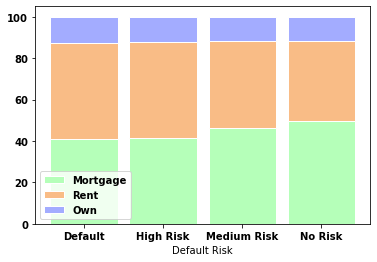

In [32]:
# Data
bar1 = [home_def['Default']['MORTGAGE'], home_def['High Risk']['MORTGAGE'], home_def['Medium Risk']['MORTGAGE'], home_def['No Risk']['MORTGAGE']]
bar2 = [home_def['Default']['RENT'], home_def['High Risk']['RENT'], home_def['Medium Risk']['RENT'], home_def['No Risk']['RENT']]
bar3 = [home_def['Default']['OWN'], home_def['High Risk']['OWN'], home_def['Medium Risk']['OWN'], home_def['No Risk']['OWN']]

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(bar1, bar2, bar3)]
mortgage = [i / j * 100 for i,j in zip(bar1, totals)]
rent = [i / j * 100 for i,j in zip(bar2, totals)]
own = [i / j * 100 for i,j in zip(bar3, totals)]
 
# plot
barWidth = 0.85
names = ('Default', 'High Risk', 'Medium Risk', 'No Risk')
r = [0, 1, 2, 3] 

# Create bars
plt.bar(r, mortgage, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'Mortgage')
plt.bar(r, rent, bottom=mortgage, color='#f9bc86', edgecolor='white', width=barWidth, label = 'Rent')
plt.bar(r, own, bottom=[i+j for i,j in zip(mortgage, rent)], color='#a3acff', edgecolor='white', width=barWidth, label = 'Own')
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Default Risk")

#Legend
plt.legend(['Mortgage','Rent','Own'])

# Show graphic
plt.show()

### 3. Home Ownership vs. Income Level

In [33]:
# calculate home ownership for each income level
home_inc = data.groupby(['income_level', 'home_ownership'])['income_level'].count()
home_inc

income_level  home_ownership
high          ANY                  162
              MORTGAGE          124801
              OWN                20342
              RENT               50585
low           ANY                  105
              MORTGAGE           58376
              NONE                   2
              OWN                28030
              RENT              101549
mid_high      ANY                  116
              MORTGAGE          101406
              NONE                   1
              OWN                19572
              RENT               63469
mid_low       ANY                  121
              MORTGAGE           86996
              NONE                   1
              OWN                22207
              RENT               81497
Name: income_level, dtype: int64

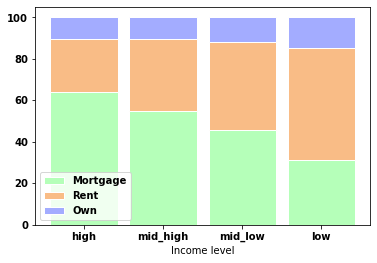

In [34]:
# Data
bar1 = [home_inc['high']['MORTGAGE'], home_inc['mid_high']['MORTGAGE'], home_inc['mid_low']['MORTGAGE'], home_inc['low']['MORTGAGE']]
bar2 = [home_inc['high']['RENT'], home_inc['mid_high']['RENT'], home_inc['mid_low']['RENT'], home_inc['low']['RENT']]
bar3 = [home_inc['high']['OWN'], home_inc['mid_high']['OWN'], home_inc['mid_low']['OWN'], home_inc['low']['OWN']]

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(bar1, bar2, bar3)]
mortgage = [i / j * 100 for i,j in zip(bar1, totals)]
rent = [i / j * 100 for i,j in zip(bar2, totals)]
own = [i / j * 100 for i,j in zip(bar3, totals)]
 
# plot
barWidth = 0.85
names = ('high', 'mid_high', 'mid_low', 'low')
r = [0, 1, 2, 3] 

# Create bars
plt.bar(r, mortgage, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'Mortgage')
plt.bar(r, rent, bottom=mortgage, color='#f9bc86', edgecolor='white', width=barWidth, label = 'Rent')
plt.bar(r, own, bottom=[i+j for i,j in zip(mortgage, rent)], color='#a3acff', edgecolor='white', width=barWidth, label = 'Own')
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Income level")

#Legend
plt.legend(['Mortgage','Rent','Own'])

# Show graphic
plt.show()

### 4. Home Ownership vs. Term

In [35]:
# calculate home ownership for term
home_trm = data.groupby(['term', 'home_ownership'])['term'].count()
home_trm

term       home_ownership
36 months  ANY                  390
           MORTGAGE          256829
           NONE                   3
           OWN                69754
           RENT              234261
60 months  ANY                  114
           MORTGAGE          114750
           NONE                   1
           OWN                20397
           RENT               62839
Name: term, dtype: int64

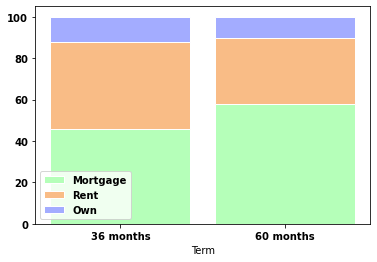

In [36]:
# Data
bar1 = [home_trm['36 months']['MORTGAGE'], home_trm['60 months']['MORTGAGE']]
bar2 = [home_trm['36 months']['RENT'], home_trm['60 months']['RENT']]
bar3 = [home_trm['36 months']['OWN'], home_trm['60 months']['OWN']]

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(bar1, bar2, bar3)]
mortgage = [i / j * 100 for i,j in zip(bar1, totals)]
rent = [i / j * 100 for i,j in zip(bar2, totals)]
own = [i / j * 100 for i,j in zip(bar3, totals)]
 
# plot
barWidth = 0.85
names = ('36 months', '60 months')
r = [0, 1] 

# Create bars
plt.bar(r, mortgage, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'Mortgage')
plt.bar(r, rent, bottom=mortgage, color='#f9bc86', edgecolor='white', width=barWidth, label = 'Rent')
plt.bar(r, own, bottom=[i+j for i,j in zip(mortgage, rent)], color='#a3acff', edgecolor='white', width=barWidth, label = 'Own')
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Term")

#Legend
plt.legend(['Mortgage','Rent','Own'])

# Show graphic
plt.show()

### 5. Home Ownership vs. Average Annual Income

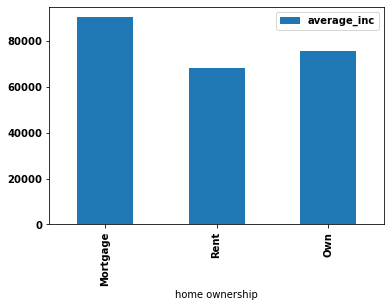

In [37]:
annInc = data["annual_inc"]

mortgage = data.loc[data["home_ownership"] == "MORTGAGE"]
rent = data.loc[data["home_ownership"] == "RENT"]
own = data.loc[data["home_ownership"] == "OWN"]

mortgageMean = mortgage["annual_inc"].mean()
rentMean = rent["annual_inc"].mean()
ownMean = own["annual_inc"].mean()

riskMean = pd.DataFrame({'home ownership':["Mortgage", "Rent", "Own"],'average_inc':[mortgageMean,rentMean,ownMean]})

riskMean

plot1 = riskMean.plot.bar(x = 'home ownership', y = 'average_inc')

## Algorithm Analysis with Feature Set 1

### 1. Decision Tree

In [38]:
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,last_pymnt_amnt,default_risk,income_level
0,112435993,2300,2300,2300.0,36 months,12.62,C,C1,OWN,10000.0,Current,n,credit_card,21.61,0,382.99,382.99,77.08,No Risk,low
1,112290210,16000,16000,16000.0,60 months,12.62,C,C1,MORTGAGE,94000.0,Current,n,debt_consolidation,25.61,0,2060.09,2060.09,360.95,No Risk,mid_high
2,112436985,6025,6025,6025.0,36 months,15.05,C,C4,MORTGAGE,46350.0,Current,n,home_improvement,8.88,0,1032.46,1032.46,209.01,No Risk,low
3,112439006,20400,20400,20400.0,36 months,9.44,B,B1,RENT,44000.0,Current,n,car,27.06,0,3237.80,3237.80,652.91,No Risk,low
4,112438929,13000,13000,13000.0,36 months,11.99,B,B5,MORTGAGE,85000.0,Current,n,debt_consolidation,6.79,1,2137.00,2137.00,431.73,No Risk,mid_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,A,A5,OWN,38000.0,Current,n,credit_card,12.35,0,4314.93,4314.93,187.72,No Risk,low
759334,66055600,6000,6000,6000.0,36 months,9.17,B,B2,RENT,32640.0,Current,n,debt_consolidation,22.76,0,4417.05,4417.05,191.28,No Risk,low
759335,66141895,14400,14400,14400.0,60 months,13.18,C,C3,RENT,47000.0,Late (16-30 days),n,credit_card,19.64,0,7227.02,7227.02,328.98,Medium Risk,low
759336,65673209,34050,34050,34050.0,36 months,15.41,D,D1,MORTGAGE,87800.0,Current,n,credit_card,12.10,1,27480.73,27480.73,1187.21,No Risk,mid_high


In [39]:
# convert default risk into numeric
levels = {"No Risk":0, "Medium Risk":1,"High Risk":2,"Default":3}
data['default_num'] = data['default_risk'].map(levels)

# convert grade level into numeric
gradeLevels = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6}
data["grade_num"] = data["grade"].map(gradeLevels)
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,...,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,last_pymnt_amnt,default_risk,income_level,default_num,grade_num
0,112435993,2300,2300,2300.0,36 months,12.62,C,C1,OWN,10000.0,...,credit_card,21.61,0,382.99,382.99,77.08,No Risk,low,0,2
1,112290210,16000,16000,16000.0,60 months,12.62,C,C1,MORTGAGE,94000.0,...,debt_consolidation,25.61,0,2060.09,2060.09,360.95,No Risk,mid_high,0,2
2,112436985,6025,6025,6025.0,36 months,15.05,C,C4,MORTGAGE,46350.0,...,home_improvement,8.88,0,1032.46,1032.46,209.01,No Risk,low,0,2
3,112439006,20400,20400,20400.0,36 months,9.44,B,B1,RENT,44000.0,...,car,27.06,0,3237.80,3237.80,652.91,No Risk,low,0,1
4,112438929,13000,13000,13000.0,36 months,11.99,B,B5,MORTGAGE,85000.0,...,debt_consolidation,6.79,1,2137.00,2137.00,431.73,No Risk,mid_high,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,A,A5,OWN,38000.0,...,credit_card,12.35,0,4314.93,4314.93,187.72,No Risk,low,0,0
759334,66055600,6000,6000,6000.0,36 months,9.17,B,B2,RENT,32640.0,...,debt_consolidation,22.76,0,4417.05,4417.05,191.28,No Risk,low,0,1
759335,66141895,14400,14400,14400.0,60 months,13.18,C,C3,RENT,47000.0,...,credit_card,19.64,0,7227.02,7227.02,328.98,Medium Risk,low,1,2
759336,65673209,34050,34050,34050.0,36 months,15.41,D,D1,MORTGAGE,87800.0,...,credit_card,12.10,1,27480.73,27480.73,1187.21,No Risk,mid_high,0,3


In [40]:
protoData = data[data.default_num != 0]
features = ["loan_amnt","funded_amnt","int_rate","grade_num","annual_inc"]
X = protoData[features]
y = protoData["default_num"]
X

,loan_amnt,funded_amnt,int_rate,grade_num,annual_inc
104,4500,4500,20.00,3,33000.0
181,20000,20000,18.06,3,85000.0
217,5000,5000,10.42,1,35000.0
243,35000,35000,15.05,2,450000.0
307,15000,15000,30.65,5,69000.0
...,...,...,...,...,...
759319,25000,25000,18.99,4,62000.0
759324,5000,5000,15.41,3,60000.0
759328,6000,6000,26.77,6,20000.0
759330,24100,24100,18.49,4,65000.0


In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

# split data into tranining and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# feature scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Creating the classifier object 
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 1,max_depth=4, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
clf_gini

# print predict value
y_pred = clf_gini.predict(X_test) 
print("Predicted values: ",y_pred) 

# print accuracy and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print(confusion_matrix(y_test, y_pred))  # confusion matrix     
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)      
print(classification_report(y_test, y_pred)) # report


Predicted values:  [3 3 3 ... 3 3 3]
[[    5    94  3047]
 [    8   134  4544]
 [    1    71 11026]]
Accuracy :  58.98045430533545
              precision    recall  f1-score   support

           1       0.36      0.00      0.00      3146
           2       0.45      0.03      0.05      4686
           3       0.59      0.99      0.74     11098

    accuracy                           0.59     18930
   macro avg       0.47      0.34      0.27     18930
weighted avg       0.52      0.59      0.45     18930



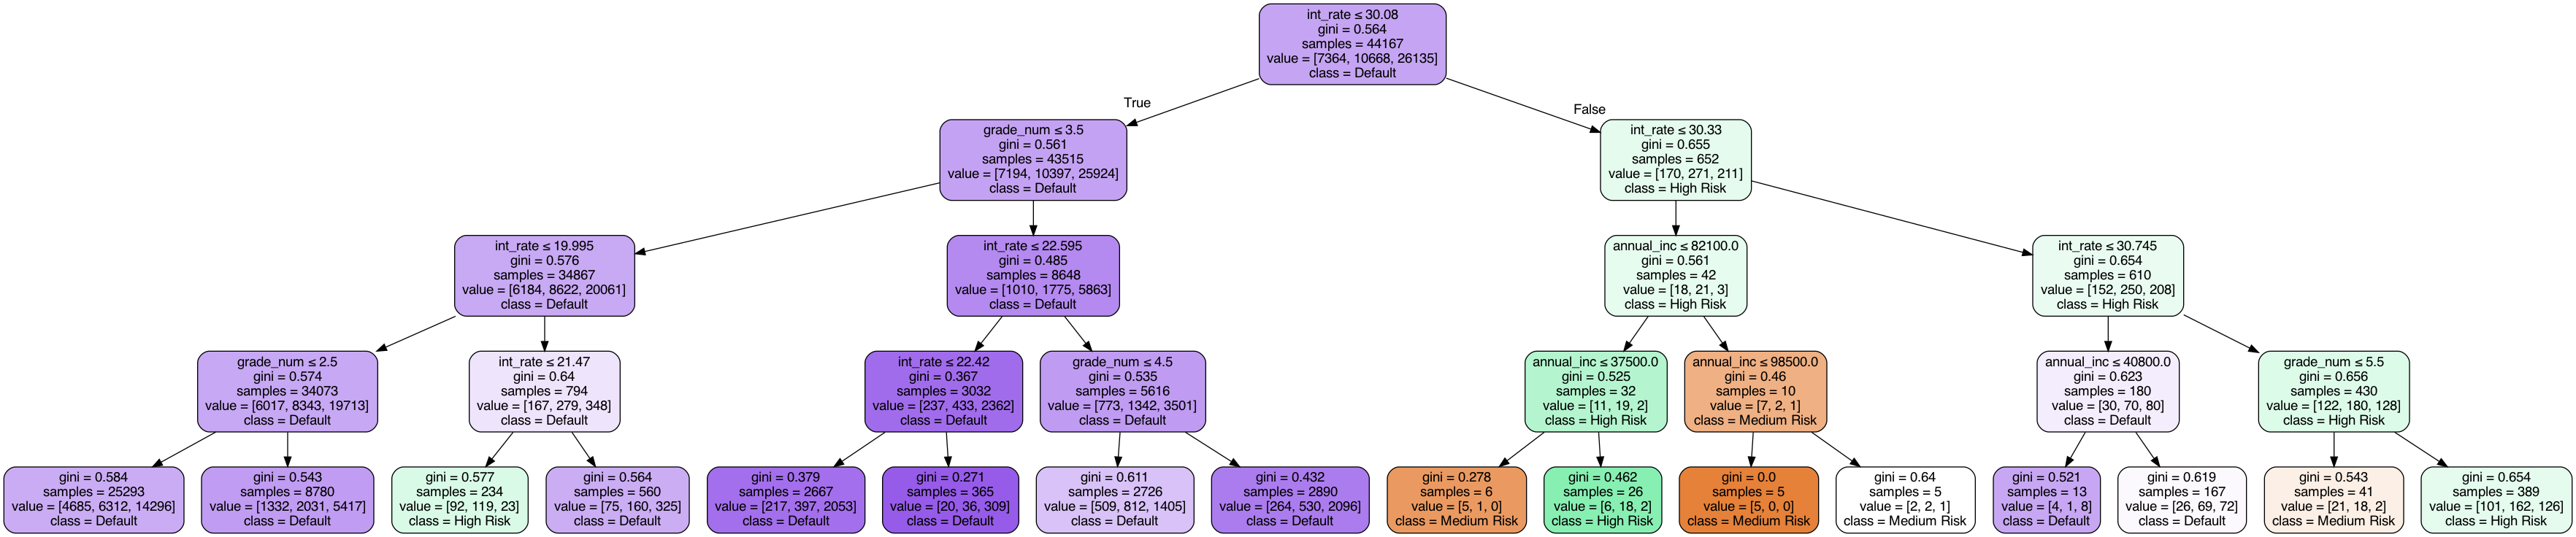

In [42]:
from sklearn.tree import export_graphviz
import six
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = features,class_names = ['Medium Risk','High Risk','Default'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree1.png')
Image(graph.create_png())

In [43]:
#from sklearn.tree import export_graphviz
#import six
#from six import StringIO  
#export_graphviz(clf, out_file="loantree.dot",filled=True, rounded=True,feature_names=features,
                #class_names=['1','2','3'])


#import graphviz

#import os
#os.environ["PATH"] += os.pathsep + '/Users/candice/opt/anaconda3/pkgs/graphviz-2.40.1-hefbbd9a_2/bin'  #replaced this by the address of where your bin file is.
#with open("loantree.dot") as f:
    #dot_graph = f.read()
#graphviz.Source(dot_graph)

In [44]:
# print features importances
feature_imp = pd.Series(clf_gini.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

int_rate       0.496344
grade_num      0.485612
annual_inc     0.018043
funded_amnt    0.000000
loan_amnt      0.000000
dtype: float64

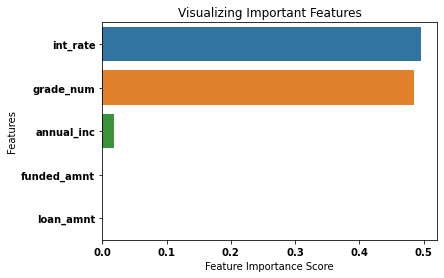

In [45]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 2. Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Predicted values: ",y_pred) 

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate mean absolute percentage error (MAPE)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy)

Predicted values:  [2.99       2.46       2.17       ... 2.69       1.95       2.70466667]
Mean Absolute Error: 0.6290545437784717
Mean Squared Error: 0.6270872649407532
Root Mean Squared Error: 0.7918884169759987
Accuracy: 63.24163369744945


In [47]:
feature_imp = pd.Series(rf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

annual_inc     0.415659
funded_amnt    0.192719
loan_amnt      0.191682
int_rate       0.181841
grade_num      0.018099
dtype: float64

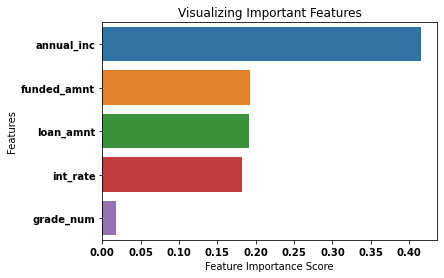

In [48]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 3. KNN

In [49]:
protoData = data[data.default_num != 0]
features = ["loan_amnt","funded_amnt","int_rate","grade_num","annual_inc"]
X = protoData[features].values
y = protoData["default_num"].values
X

array([[4.500e+03, 4.500e+03, 2.000e+01, 3.000e+00, 3.300e+04],
       [2.000e+04, 2.000e+04, 1.806e+01, 3.000e+00, 8.500e+04],
       [5.000e+03, 5.000e+03, 1.042e+01, 1.000e+00, 3.500e+04],
       ...,
       [6.000e+03, 6.000e+03, 2.677e+01, 6.000e+00, 2.000e+04],
       [2.410e+04, 2.410e+04, 1.849e+01, 4.000e+00, 6.500e+04],
       [1.440e+04, 1.440e+04, 1.318e+01, 2.000e+00, 4.700e+04]])

Text(0, 0.5, 'Mean Error')

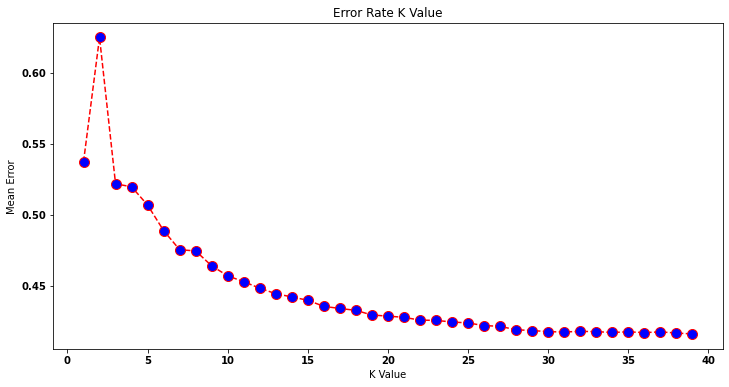

In [50]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [51]:
knn = KNeighborsClassifier(n_neighbors=30, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Predicted values: ',y_pred)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))  # confusion matrix
print(classification_report(y_test, y_pred))  # report

Predicted values:  [3 3 3 ... 3 2 3]
[[   55   169  2922]
 [   48   268  4370]
 [   74   325 10699]]
              precision    recall  f1-score   support

           1       0.31      0.02      0.03      3146
           2       0.35      0.06      0.10      4686
           3       0.59      0.96      0.74     11098

    accuracy                           0.58     18930
   macro avg       0.42      0.35      0.29     18930
weighted avg       0.49      0.58      0.46     18930



## Algorithm Analysis with Feature Set 2

### 1. Decision Tree

In [52]:
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,...,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,last_pymnt_amnt,default_risk,income_level,default_num,grade_num
0,112435993,2300,2300,2300.0,36 months,12.62,C,C1,OWN,10000.0,...,credit_card,21.61,0,382.99,382.99,77.08,No Risk,low,0,2
1,112290210,16000,16000,16000.0,60 months,12.62,C,C1,MORTGAGE,94000.0,...,debt_consolidation,25.61,0,2060.09,2060.09,360.95,No Risk,mid_high,0,2
2,112436985,6025,6025,6025.0,36 months,15.05,C,C4,MORTGAGE,46350.0,...,home_improvement,8.88,0,1032.46,1032.46,209.01,No Risk,low,0,2
3,112439006,20400,20400,20400.0,36 months,9.44,B,B1,RENT,44000.0,...,car,27.06,0,3237.80,3237.80,652.91,No Risk,low,0,1
4,112438929,13000,13000,13000.0,36 months,11.99,B,B5,MORTGAGE,85000.0,...,debt_consolidation,6.79,1,2137.00,2137.00,431.73,No Risk,mid_high,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,A,A5,OWN,38000.0,...,credit_card,12.35,0,4314.93,4314.93,187.72,No Risk,low,0,0
759334,66055600,6000,6000,6000.0,36 months,9.17,B,B2,RENT,32640.0,...,debt_consolidation,22.76,0,4417.05,4417.05,191.28,No Risk,low,0,1
759335,66141895,14400,14400,14400.0,60 months,13.18,C,C3,RENT,47000.0,...,credit_card,19.64,0,7227.02,7227.02,328.98,Medium Risk,low,1,2
759336,65673209,34050,34050,34050.0,36 months,15.41,D,D1,MORTGAGE,87800.0,...,credit_card,12.10,1,27480.73,27480.73,1187.21,No Risk,mid_high,0,3


In [53]:
# drop rows with null dti values
df = data[data['dti'].notnull()] 
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,...,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,last_pymnt_amnt,default_risk,income_level,default_num,grade_num
0,112435993,2300,2300,2300.0,36 months,12.62,C,C1,OWN,10000.0,...,credit_card,21.61,0,382.99,382.99,77.08,No Risk,low,0,2
1,112290210,16000,16000,16000.0,60 months,12.62,C,C1,MORTGAGE,94000.0,...,debt_consolidation,25.61,0,2060.09,2060.09,360.95,No Risk,mid_high,0,2
2,112436985,6025,6025,6025.0,36 months,15.05,C,C4,MORTGAGE,46350.0,...,home_improvement,8.88,0,1032.46,1032.46,209.01,No Risk,low,0,2
3,112439006,20400,20400,20400.0,36 months,9.44,B,B1,RENT,44000.0,...,car,27.06,0,3237.80,3237.80,652.91,No Risk,low,0,1
4,112438929,13000,13000,13000.0,36 months,11.99,B,B5,MORTGAGE,85000.0,...,debt_consolidation,6.79,1,2137.00,2137.00,431.73,No Risk,mid_high,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,A,A5,OWN,38000.0,...,credit_card,12.35,0,4314.93,4314.93,187.72,No Risk,low,0,0
759334,66055600,6000,6000,6000.0,36 months,9.17,B,B2,RENT,32640.0,...,debt_consolidation,22.76,0,4417.05,4417.05,191.28,No Risk,low,0,1
759335,66141895,14400,14400,14400.0,60 months,13.18,C,C3,RENT,47000.0,...,credit_card,19.64,0,7227.02,7227.02,328.98,Medium Risk,low,1,2
759336,65673209,34050,34050,34050.0,36 months,15.41,D,D1,MORTGAGE,87800.0,...,credit_card,12.10,1,27480.73,27480.73,1187.21,No Risk,mid_high,0,3


In [54]:
# split the data into X and y
protoData = df[df.default_num != 0]
features = ['funded_amnt','annual_inc','int_rate','dti','total_pymnt']
X = protoData[features]
y = protoData["default_num"]
X

,funded_amnt,annual_inc,int_rate,dti,total_pymnt
104,4500,33000.0,20.00,32.33,791.20
181,20000,85000.0,18.06,14.63,2844.47
217,5000,35000.0,10.42,7.89,479.75
243,35000,450000.0,15.05,13.76,2427.55
307,15000,69000.0,30.65,27.53,2965.42
...,...,...,...,...,...
759319,25000,62000.0,18.99,19.63,8413.83
759324,5000,60000.0,15.41,32.34,2430.50
759328,6000,20000.0,26.77,29.11,923.52
759330,24100,65000.0,18.49,17.54,11106.98


In [55]:
#from sklearn.metrics import confusion_matrix 
#from sklearn.metrics import accuracy_score 
#from sklearn.metrics import classification_report 

# split data into tranining and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# feature scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Creating the classifier object 
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 1,max_depth=4, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
clf_gini

# print predict value
y_pred = clf_gini.predict(X_test) 
print("Predicted values: ",y_pred) 

# print accuracy and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print(confusion_matrix(y_test, y_pred))     # confusion matrix  
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)      
print(classification_report(y_test, y_pred))  # report

Predicted values:  [3 3 3 ... 3 3 3]
[[  358    81  2682]
 [  297   119  4320]
 [  171   126 10771]]
Accuracy :  59.434610303830915
              precision    recall  f1-score   support

           1       0.43      0.11      0.18      3121
           2       0.37      0.03      0.05      4736
           3       0.61      0.97      0.75     11068

    accuracy                           0.59     18925
   macro avg       0.47      0.37      0.33     18925
weighted avg       0.52      0.59      0.48     18925



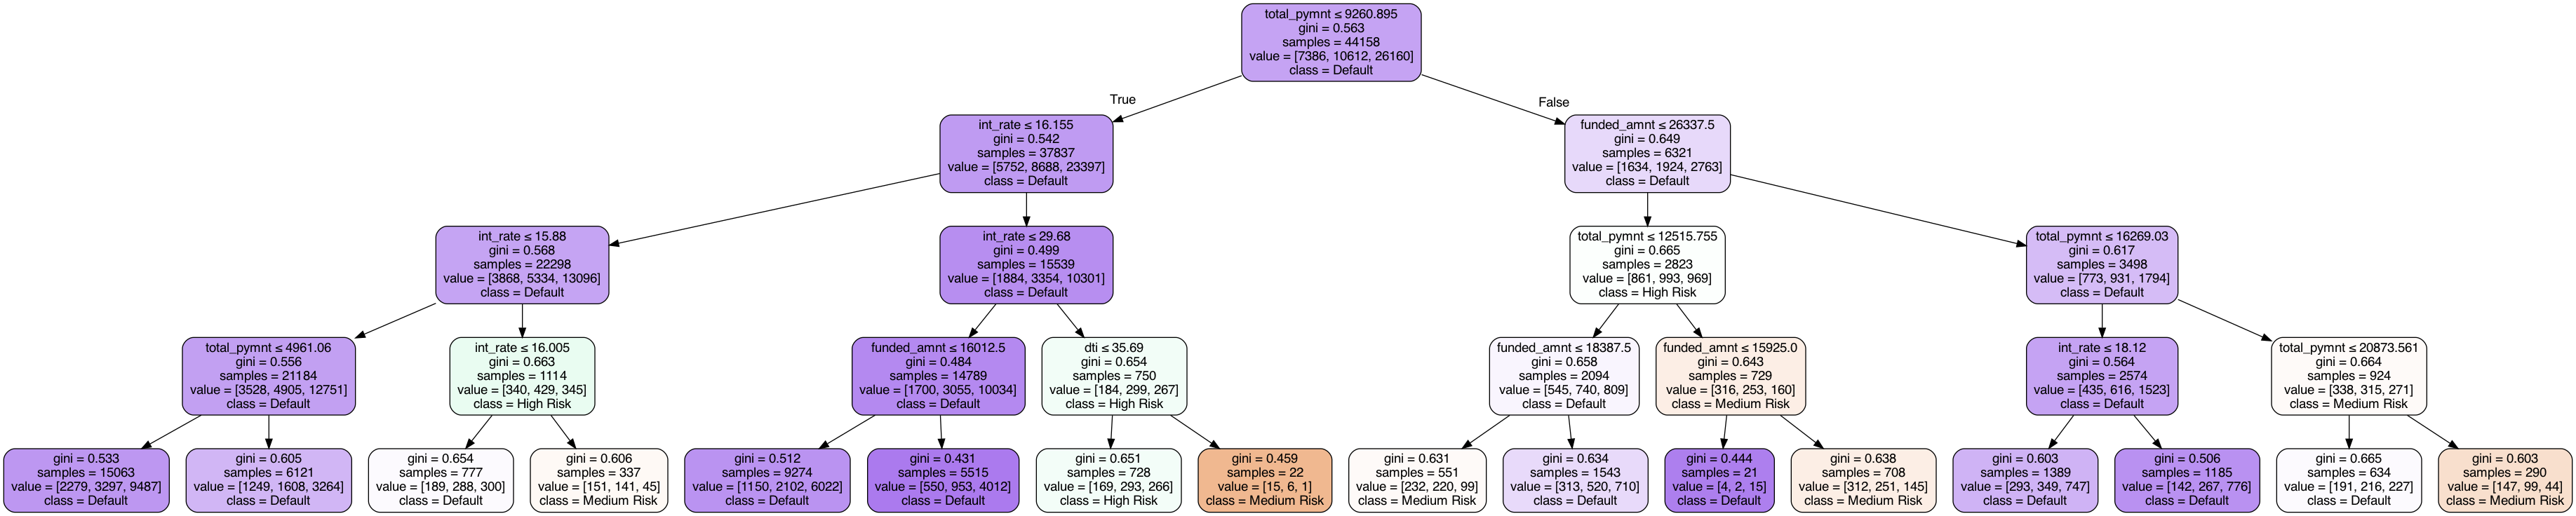

In [56]:
# print out decision tree
from sklearn.tree import export_graphviz
import six
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names = features, class_names = ['Medium Risk','High Risk','Default'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree2.png')
Image(graph.create_png())

In [57]:
# print features importances
feature_imp = pd.Series(clf_gini.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

total_pymnt    0.467342
int_rate       0.366342
funded_amnt    0.159532
dti            0.006785
annual_inc     0.000000
dtype: float64

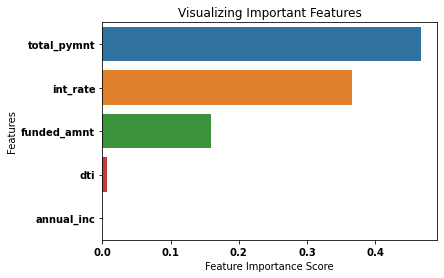

In [58]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 2. Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Predicted values: ",y_pred) 

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate mean absolute percentage error (MAPE)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy)

Predicted values:  [2.08 1.98 2.93 ... 2.88 2.15 2.58]
Mean Absolute Error: 0.497623249669749
Mean Squared Error: 0.4047592708058124
Root Mean Squared Error: 0.6362069402370681
Accuracy: 70.6526992514311


In [60]:
feature_imp = pd.Series(rf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

total_pymnt    0.275983
int_rate       0.232288
dti            0.178589
funded_amnt    0.164160
annual_inc     0.148980
dtype: float64

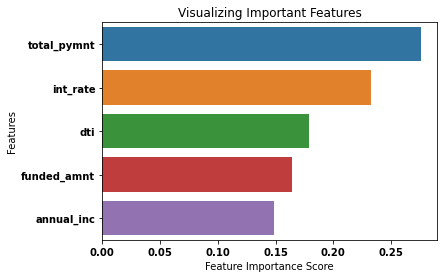

In [61]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 3. KNN

In [62]:
# remove rows with null dti values
kdf = data[data['dti'].notnull()] 
kdf

protoData = kdf[kdf.default_num != 0]
kfeatures = ['funded_amnt','annual_inc','int_rate','dti','total_pymnt']
X = protoData[kfeatures].values
y = protoData['default_num'].values
X

array([[4.500000e+03, 3.300000e+04, 2.000000e+01, 3.233000e+01,
        7.912000e+02],
       [2.000000e+04, 8.500000e+04, 1.806000e+01, 1.463000e+01,
        2.844470e+03],
       [5.000000e+03, 3.500000e+04, 1.042000e+01, 7.890000e+00,
        4.797500e+02],
       ...,
       [6.000000e+03, 2.000000e+04, 2.677000e+01, 2.911000e+01,
        9.235200e+02],
       [2.410000e+04, 6.500000e+04, 1.849000e+01, 1.754000e+01,
        1.110698e+04],
       [1.440000e+04, 4.700000e+04, 1.318000e+01, 1.964000e+01,
        7.227020e+03]])

Text(0, 0.5, 'Mean Error')

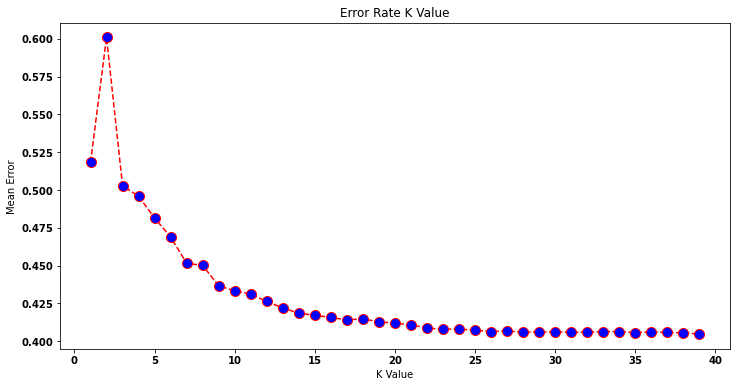

In [63]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [64]:
knn = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Predicted values: ',y_pred)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred)) # confusion matrix
print(classification_report(y_test, y_pred))  # report

Predicted values:  [3 3 3 ... 3 3 3]
[[  291   433  2397]
 [  230   516  3990]
 [  187   470 10411]]
              precision    recall  f1-score   support

           1       0.41      0.09      0.15      3121
           2       0.36      0.11      0.17      4736
           3       0.62      0.94      0.75     11068

    accuracy                           0.59     18925
   macro avg       0.46      0.38      0.36     18925
weighted avg       0.52      0.59      0.50     18925



### 4. Kmeans

In [66]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [67]:
# remove rows with null dti values
kdf = data[data['dti'].notnull()] 
kdf

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,annual_inc,...,purpose,dti,delinq_2yrs,total_pymnt,total_pymnt_inv,last_pymnt_amnt,default_risk,income_level,default_num,grade_num
0,112435993,2300,2300,2300.0,36 months,12.62,C,C1,OWN,10000.0,...,credit_card,21.61,0,382.99,382.99,77.08,No Risk,low,0,2
1,112290210,16000,16000,16000.0,60 months,12.62,C,C1,MORTGAGE,94000.0,...,debt_consolidation,25.61,0,2060.09,2060.09,360.95,No Risk,mid_high,0,2
2,112436985,6025,6025,6025.0,36 months,15.05,C,C4,MORTGAGE,46350.0,...,home_improvement,8.88,0,1032.46,1032.46,209.01,No Risk,low,0,2
3,112439006,20400,20400,20400.0,36 months,9.44,B,B1,RENT,44000.0,...,car,27.06,0,3237.80,3237.80,652.91,No Risk,low,0,1
4,112438929,13000,13000,13000.0,36 months,11.99,B,B5,MORTGAGE,85000.0,...,debt_consolidation,6.79,1,2137.00,2137.00,431.73,No Risk,mid_high,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,A,A5,OWN,38000.0,...,credit_card,12.35,0,4314.93,4314.93,187.72,No Risk,low,0,0
759334,66055600,6000,6000,6000.0,36 months,9.17,B,B2,RENT,32640.0,...,debt_consolidation,22.76,0,4417.05,4417.05,191.28,No Risk,low,0,1
759335,66141895,14400,14400,14400.0,60 months,13.18,C,C3,RENT,47000.0,...,credit_card,19.64,0,7227.02,7227.02,328.98,Medium Risk,low,1,2
759336,65673209,34050,34050,34050.0,36 months,15.41,D,D1,MORTGAGE,87800.0,...,credit_card,12.10,1,27480.73,27480.73,1187.21,No Risk,mid_high,0,3


In [68]:
# extract out features 
protoData = kdf[kdf.default_risk != 'No Risk']
kfeatures = ['funded_amnt','annual_inc','int_rate','dti','total_pymnt']
X = protoData[kfeatures].values
y = protoData['default_risk'].values
X

array([[4.500000e+03, 3.300000e+04, 2.000000e+01, 3.233000e+01,
        7.912000e+02],
       [2.000000e+04, 8.500000e+04, 1.806000e+01, 1.463000e+01,
        2.844470e+03],
       [5.000000e+03, 3.500000e+04, 1.042000e+01, 7.890000e+00,
        4.797500e+02],
       ...,
       [6.000000e+03, 2.000000e+04, 2.677000e+01, 2.911000e+01,
        9.235200e+02],
       [2.410000e+04, 6.500000e+04, 1.849000e+01, 1.754000e+01,
        1.110698e+04],
       [1.440000e+04, 4.700000e+04, 1.318000e+01, 1.964000e+01,
        7.227020e+03]])

In [69]:
# encode the default risk label
label_encoder = LabelEncoder()
true_y = label_encoder.fit_transform(y)

# save number of cluster for later use
n_clusters = len(label_encoder.classes_)
label_encoder.classes_

array(['Default', 'High Risk', 'Medium Risk'], dtype=object)

In [70]:
# build a preprocessing pipeline
#The pipeline will implement an alternative to the StandardScaler class called MinMaxScaler for feature scaling.
preprocessor = Pipeline([("scaler", MinMaxScaler()), ("pca", PCA(n_components=2, random_state=1)),])

# build a separate pipeline to perform k-means clustering
clusterer = Pipeline([("kmeans",KMeans(n_clusters=n_clusters, init="k-means++", n_init=50, max_iter=500,
                                       random_state=1,),),])

#The Pipeline class can be chained to form a larger pipeline. 
#Build an end-to-end k-means clustering pipeline by passing the "preprocessor" and "clusterer" pipelines to Pipeline
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

#Calling .fit() with data as the argument performs all the pipeline steps on the data
pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=3, n_init=50,
                                         random_state=1))]))])

In [ ]:
#Evaluate the performance by calculating the silhouette coefficient
preprocessed_X = pipe["preprocessor"].transform(X)
predicted_y = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_X, predicted_y)
# A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, 
# and a silhouette coefficient of 1 indicates clusters are well-separated

In [ ]:
#Calculate ARI, too, since the ground truth cluster labels are available
adjusted_rand_score(true_y, predicted_y)
# An ARI score of 0 indicates that cluster labels are randomly assigned, 
# and an ARI score of 1 means that the true labels and predicted labels form identical clusters.


In [ ]:
# visualize the data in the context of the true labels and predicted labels
pcadf = pd.DataFrame(pipe["preprocessor"].transform(X), columns=["component_1", "component_2"],)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_y"] = label_encoder.inverse_transform(true_y)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot("component_1", "component_2", s=50, data=pcadf, hue="predicted_cluster", style="true_y",
                       palette="Set2",)

scat.set_title("Clustering results from loans")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

## Algorithms with Top 10 Attributes

### Select Attributes and Remap

In [65]:
data = pd.read_csv("lc_2016_2017.csv")

# Add a new column named 'default_risk'  
default_dictionary = {'Current':'No Risk', 'Fully Paid':'No Risk', 'Charged Off':'Default', 'Late (31-120 days)':'High Risk',
                     'Late (16-30 days)':'Medium Risk', 'In Grace Period':'Medium Risk', 'Default':'Default'} 
data['default_risk'] = data['loan_status'].map(default_dictionary) 

# change payment plan to numeric
pymntPlan_dictionary = {'n':0,'y':1}
data['pymnt_plan'] = data['pymnt_plan'].map(pymntPlan_dictionary)

# change default risk to numeric
levels = {"No Risk":0, "Medium Risk":1,"High Risk":2,"Default":3}
data['default_risk'] = data['default_risk'].map(levels)

# change grade to numeric
gradeLevels = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6}
data["grade"] = data["grade"].map(gradeLevels)
data

/Users/candice/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_risk
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,2,C1,...,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0,0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,2,C1,...,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0,0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,2,C4,...,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0,0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,1,B1,...,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0,0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,1,B5,...,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,NaN,6000,6000,6000.0,36 months,7.89,187.72,0,A5,...,NaN,NaN,NaN,NaN,NaN,21400.0,NaN,NaN,NaN,0
759334,66055600,NaN,6000,6000,6000.0,36 months,9.17,191.28,1,B2,...,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN,0
759335,66141895,NaN,14400,14400,14400.0,60 months,13.18,328.98,2,C3,...,NaN,NaN,NaN,NaN,NaN,18300.0,NaN,NaN,NaN,1
759336,65673209,NaN,34050,34050,34050.0,36 months,15.41,1187.21,3,D1,...,NaN,NaN,NaN,NaN,NaN,47900.0,NaN,NaN,NaN,0


In [66]:
protoData = data[data.default_risk != 0]
features = ["recoveries","collection_recovery_fee","int_rate","total_rec_prncp","total_rec_int","total_pymnt",
            "pymnt_plan","last_pymnt_amnt","total_rec_late_fee","grade"]
X=protoData[features]
y=protoData["default_risk"]
X

,recoveries,collection_recovery_fee,int_rate,total_rec_prncp,total_rec_int,total_pymnt,pymnt_plan,last_pymnt_amnt,total_rec_late_fee,grade
104,0.00,0.0000,20.00,476.24,314.96,791.20,0,167.24,0.0,3
181,0.00,0.0000,18.06,1727.01,1117.46,2844.47,0,723.66,0.0,3
217,0.00,0.0000,10.42,359.85,119.90,479.75,0,162.33,0.0,1
243,0.00,0.0000,15.05,1198.74,1228.81,2427.55,0,833.57,0.0,2
307,0.00,0.0000,30.65,1359.80,1605.62,2965.42,0,642.13,0.0,5
...,...,...,...,...,...,...,...,...,...,...
759319,0.00,0.0000,18.99,4993.73,3420.10,8413.83,0,916.28,0.0,4
759324,865.72,155.8296,15.41,1043.65,521.13,2430.50,0,174.34,0.0,3
759328,200.00,36.0000,26.77,223.20,500.32,923.52,0,244.00,0.0,6
759330,0.00,0.0000,18.49,5080.87,6026.11,11106.98,0,618.43,0.0,4


### 1. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

# split data into tranining and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# feature scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Creating the classifier object 
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 1,max_depth=4, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
clf_gini

# print predict value
y_pred = clf_gini.predict(X_test) 
print("Predicted values: ",y_pred) 

# print accuracy and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print(confusion_matrix(y_test, y_pred))  # confusion matrix     
print ("Model accuracy : ",accuracy_score(y_test,y_pred)*100)      
print(classification_report(y_test, y_pred)) # report


Predicted values:  [3 3 3 ... 1 3 3]
[[  451   229  2466]
 [  432   605  3649]
 [  255   429 10414]]
Model accuracy :  60.59165346011621
              precision    recall  f1-score   support

           1       0.40      0.14      0.21      3146
           2       0.48      0.13      0.20      4686
           3       0.63      0.94      0.75     11098

    accuracy                           0.61     18930
   macro avg       0.50      0.40      0.39     18930
weighted avg       0.55      0.61      0.53     18930



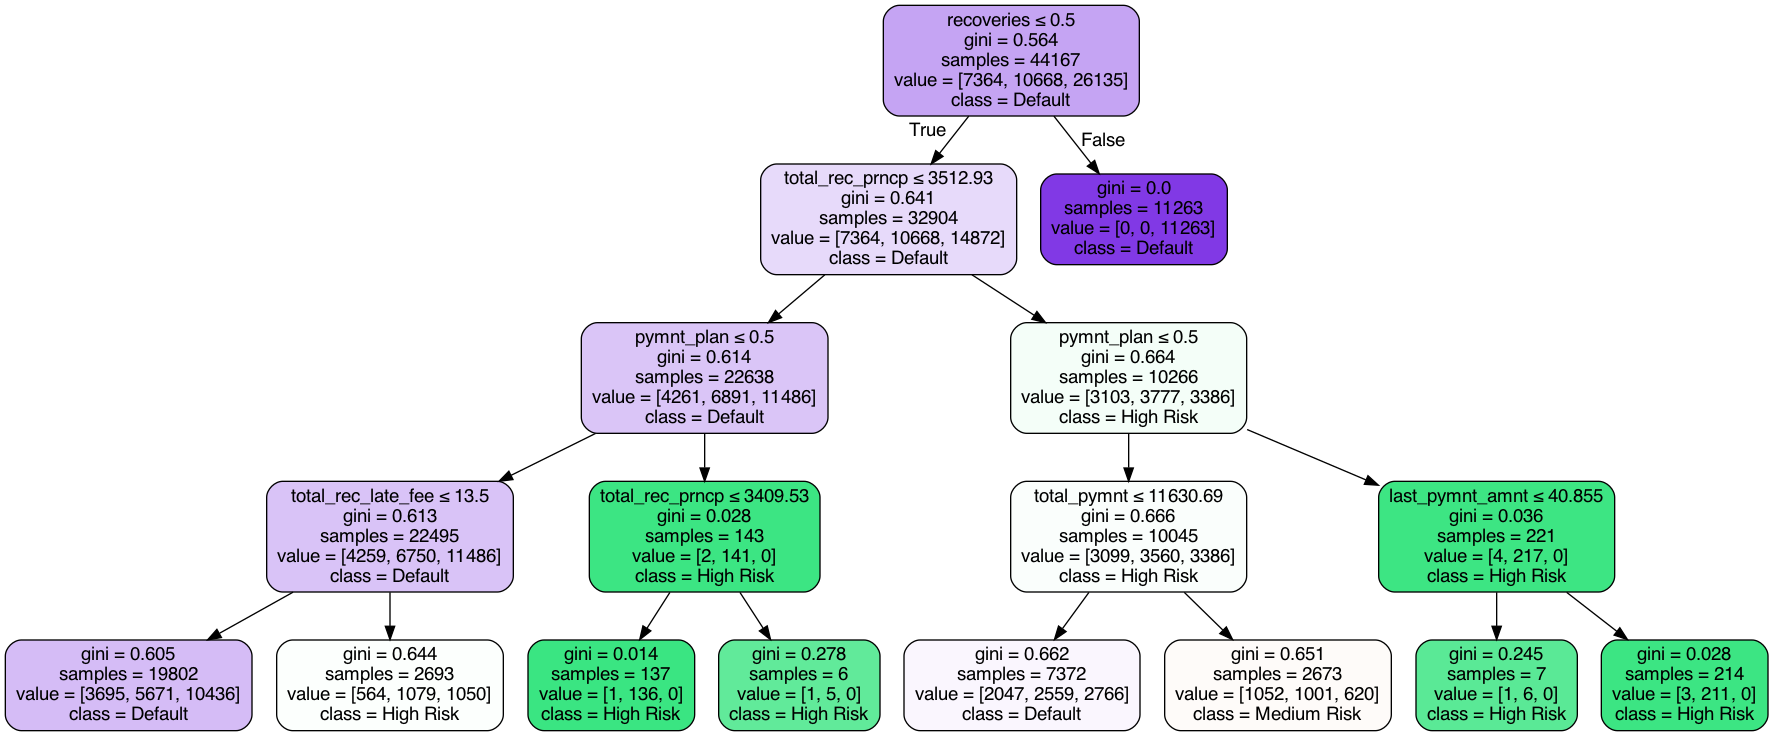

In [69]:
from sklearn.tree import export_graphviz
import six
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = features,class_names = ['Medium Risk','High Risk','Default'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('treetop10.png')
Image(graph.create_png())

In [70]:
feature_imp = pd.Series(clf_gini.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

recoveries                 0.840640
total_rec_prncp            0.075501
pymnt_plan                 0.051955
total_rec_late_fee         0.016884
total_pymnt                0.014972
last_pymnt_amnt            0.000049
grade                      0.000000
total_rec_int              0.000000
int_rate                   0.000000
collection_recovery_fee    0.000000
dtype: float64

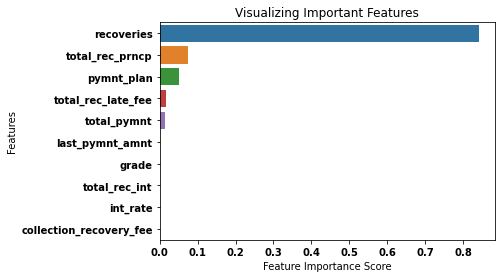

In [71]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 2. Random Forest

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Predicted values: ",y_pred) 

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate mean absolute percentage error (MAPE)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Model accuracy:', accuracy)

Predicted values:  [2.1        2.61       2.02       ... 1.57       1.83       2.04666667]
Mean Absolute Error: 0.36882854129857995
Mean Squared Error: 0.30775378618511745
Root Mean Squared Error: 0.5547556094219485
Model accuracy: 77.304152761702


In [73]:
feature_imp = pd.Series(rf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

recoveries                 0.197498
int_rate                   0.188371
last_pymnt_amnt            0.176042
total_rec_prncp            0.153727
total_pymnt                0.123619
total_rec_int              0.111755
total_rec_late_fee         0.024843
grade                      0.023000
pymnt_plan                 0.001146
collection_recovery_fee    0.000000
dtype: float64

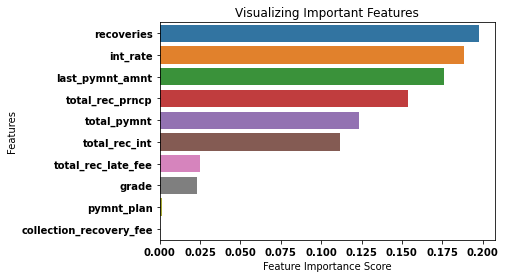

In [74]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 3. KNN

In [75]:
kfeatures = ["recoveries","collection_recovery_fee","int_rate","total_rec_prncp","total_rec_int","total_pymnt",
            "pymnt_plan","last_pymnt_amnt","total_rec_late_fee","grade"]

X = protoData[kfeatures].values
y = protoData['default_risk'].values
X

array([[  0.  ,   0.  ,  20.  , ..., 167.24,   0.  ,   3.  ],
       [  0.  ,   0.  ,  18.06, ..., 723.66,   0.  ,   3.  ],
       [  0.  ,   0.  ,  10.42, ..., 162.33,   0.  ,   1.  ],
       ...,
       [200.  ,  36.  ,  26.77, ..., 244.  ,   0.  ,   6.  ],
       [  0.  ,   0.  ,  18.49, ..., 618.43,   0.  ,   4.  ],
       [  0.  ,   0.  ,  13.18, ..., 328.98,   0.  ,   2.  ]])

Text(0, 0.5, 'Mean Error')

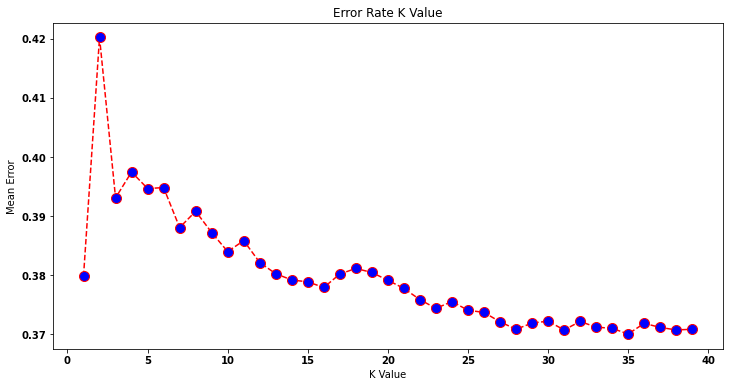

In [76]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [80]:
knn = KNeighborsClassifier(n_neighbors=28, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Predicted values: ',y_pred)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred)) # confusion matrix
print(classification_report(y_test, y_pred))  # report


Predicted values:  [2 3 3 ... 1 2 2]
[[ 610 1081 1455]
 [ 609 1737 2340]
 [ 352 1183 9563]]
              precision    recall  f1-score   support

           1       0.39      0.19      0.26      3146
           2       0.43      0.37      0.40      4686
           3       0.72      0.86      0.78     11098

    accuracy                           0.63     18930
   macro avg       0.51      0.48      0.48     18930
weighted avg       0.59      0.63      0.60     18930

